class명 __알수없는 문자 

프론트엔드 프레임워크 -> 비동기통신

fetch : 비동기통신

parameter가 존재하면  payload 생김

key:value parameter를 쿼리스트링으로 넘거야되는 부분 <-확인

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
URL = "https://m.stock.naver.com/domestic/index/KOSPI/total"

In [3]:
res = requests.get(URL)

In [4]:
soup = BeautifulSoup(res.content, 'html.parser')

In [ ]:
soup.select("") #안된다.

실시간 코스피 지수 가져오기

In [6]:
REALTIME_KOSPI_API = "https://polling.finance.naver.com/api/realtime/domestic/index/KOSPI"
response = requests.get(REALTIME_KOSPI_API)
response.status_code

200

In [7]:
#응답을 어떻게 받았을까? -  content-type 확인하기
data = response.json()
#페이지에서 response Headers - content-type 에서 확인 가능

In [8]:
#현재 코스피 가격
data['datas'][0]['closePrice']

'2,490.41'

200일치 코스피 종가를 데이터 프레임으로 정리

In [9]:
KOSPI_API = "https://api.stock.naver.com/chart/domestic/index/KOSPI?periodType=dayCandle"

In [10]:
response = requests.get(KOSPI_API)
response.status_code

200

In [11]:
datas = response.json()
price_info_datas = datas['priceInfos']
price_info_datas[:2]

[{'localDate': '20221101',
  'closePrice': 2335.22,
  'openPrice': 2301.58,
  'highPrice': 2335.57,
  'lowPrice': 2297.57,
  'accumulatedTradingVolume': 597205,
  'foreignRetentionRate': 0.0},
 {'localDate': '20221102',
  'closePrice': 2336.87,
  'openPrice': 2326.05,
  'highPrice': 2346.32,
  'lowPrice': 2323.37,
  'accumulatedTradingVolume': 450634,
  'foreignRetentionRate': 0.0}]

In [12]:
#json array 로 만들기
import pandas as pd

kospi_df = pd.DataFrame(price_info_datas)
kospi_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
105,20230403,2472.34,2485.81,2485.81,2467.59,811724,0.0
106,20230404,2480.51,2475.87,2489.71,2472.79,832555,0.0
107,20230405,2495.21,2482.61,2497.61,2478.67,632720,0.0
108,20230406,2459.23,2488.00,2488.00,2458.50,751378,0.0
109,20230407,2490.41,2478.64,2493.06,2473.89,586993,0.0


# 개인 project
시각화

코스닥, 해외-시장지표-주요-달러환율(USD)

2023.1.1 부터 오늘 까지 코스피, 코스닥, 달러환율을 시각화 -> 하나의 캔버스에 

코스피

In [13]:
import pandas as pd

In [14]:
KOSPI_API = "https://api.stock.naver.com/chart/domestic/index/KOSPI?periodType=dayCandle"
response_k = requests.get(KOSPI_API)
data_k = response_k.json()
kospi_df = pd.DataFrame(data_k['priceInfos'])

In [15]:
kospi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   localDate                 110 non-null    object 
 1   closePrice                110 non-null    float64
 2   openPrice                 110 non-null    float64
 3   highPrice                 110 non-null    float64
 4   lowPrice                  110 non-null    float64
 5   accumulatedTradingVolume  110 non-null    int64  
 6   foreignRetentionRate      110 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.1+ KB


In [16]:
kospi_df['localDate']= pd.to_datetime(kospi_df['localDate'])

In [17]:
kospi_df = kospi_df[kospi_df['localDate'].between('2023-01-01', '2023-03-29')]
kospi_price = kospi_df[['localDate','closePrice']]

In [18]:
kospi_price

,localDate,closePrice
43,2023-01-02,2225.67
44,2023-01-03,2218.68
45,2023-01-04,2255.98
46,2023-01-05,2264.65
47,2023-01-06,2289.97
48,2023-01-09,2350.19
49,2023-01-10,2351.31
50,2023-01-11,2359.53
51,2023-01-12,2365.10
52,2023-01-13,2386.09


 코스닥

In [19]:
KOSDAQ_API = "https://api.stock.naver.com/chart/domestic/index/KOSDAQ?periodType=dayCandle"
response = requests.get(KOSDAQ_API)
data = response.json()

In [20]:
kosdaq_df = pd.DataFrame(data['priceInfos'])

In [21]:
 kosdaq_df['localDate']= pd.to_datetime(kosdaq_df['localDate'])

In [22]:
kosdaq_df = kosdaq_df[kosdaq_df['localDate'].between('2023-01-01', '2023-03-29')]

In [23]:
kosdaq_price = kosdaq_df[['localDate','closePrice']]

달러환율

In [24]:

for page in range(1,8):
  page_url = f"https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode=FX_USDKRW"
  reaponse = requests.get(page_url)
  data = reaponse.json()['result']
  df = pd.DataFrame(data)

In [25]:
page_url = "https://m.stock.naver.com/front-api/v1/marketIndex/prices?page=1&category=exchange&reutersCode=FX_USDKRW"
reaponse = requests.get(page_url)
data = reaponse.json()['result']
df = pd.DataFrame(data)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   localTradedAt      10 non-null     object
 1   closePrice         10 non-null     object
 2   fluctuations       10 non-null     object
 3   fluctuationsRatio  10 non-null     object
 4   fluctuationsType   10 non-null     object
 5   cashBuyValue       10 non-null     object
 6   cashSellValue      10 non-null     object
 7   sendValue          10 non-null     object
 8   receiveValue       10 non-null     object
dtypes: object(9)
memory usage: 848.0+ bytes


In [27]:
df

,localTradedAt,closePrice,fluctuations,fluctuationsRatio,fluctuationsType,cashBuyValue,cashSellValue,sendValue,receiveValue
0,2023-04-07,"1,319.00",-0.50,-0.04,"{'code': '5', 'text': '하락', 'name': 'FALLING'}","1,342.08","1,295.92","1,331.9","1,306.1"
1,2023-04-06,"1,319.50",4.50,0.34,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,342.59","1,296.41","1,332.4","1,306.6"
2,2023-04-05,"1,315.00",2.50,0.19,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,338.01","1,291.99","1,327.8","1,302.2"
3,2023-04-04,"1,312.50",-0.50,-0.04,"{'code': '5', 'text': '하락', 'name': 'FALLING'}","1,335.46","1,289.54","1,325.3","1,299.7"
4,2023-04-03,"1,313.00",3.00,0.23,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,335.97","1,290.03","1,325.8","1,300.2"
5,2023-03-31,"1,310.00",11.50,0.89,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,332.92","1,287.08","1,322.8","1,297.2"
6,2023-03-30,"1,298.50",-4.50,-0.35,"{'code': '5', 'text': '하락', 'name': 'FALLING'}","1,321.22","1,275.78","1,311.2","1,285.8"
7,2023-03-29,"1,303.00",2.50,0.19,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,325.8","1,280.2","1,315.7","1,290.3"
8,2023-03-28,"1,300.50",-1.50,-0.12,"{'code': '5', 'text': '하락', 'name': 'FALLING'}","1,323.25","1,277.75","1,313.2","1,287.8"
9,2023-03-27,"1,302.00",2.00,0.15,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,324.78","1,279.22","1,314.7","1,289.3"


In [28]:
import datetime
df['localTradedAt'] = pd.to_datetime(df['localTradedAt'])
df['closePrice'] = df['closePrice'].str.replace(',' , '').astype(float)

In [29]:
df = df[df['localTradedAt'].between('2023-01-01', '2023-03-29')]

In [30]:
bin_df = pd.DataFrame()

In [31]:
pd.concat([bin_df, df])

,localTradedAt,closePrice,fluctuations,fluctuationsRatio,fluctuationsType,cashBuyValue,cashSellValue,sendValue,receiveValue
7,2023-03-29,1303.0,2.50,0.19,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,325.8","1,280.2","1,315.7","1,290.3"
8,2023-03-28,1300.5,-1.50,-0.12,"{'code': '5', 'text': '하락', 'name': 'FALLING'}","1,323.25","1,277.75","1,313.2","1,287.8"
9,2023-03-27,1302.0,2.00,0.15,"{'code': '2', 'text': '상승', 'name': 'RISING'}","1,324.78","1,279.22","1,314.7","1,289.3"


In [32]:
import datetime

bin_df = pd.DataFrame()

for page in range(1,10):
  page_url = f"https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode=FX_USDKRW"

  reaponse = requests.get(page_url)
  data = reaponse.json()['result']
  df = pd.DataFrame(data)
  df['localTradedAt'] = pd.to_datetime(df['localTradedAt'])
  df['closePrice'] = df['closePrice'].str.replace(',' , '').astype(float)
  df = df[df['localTradedAt'].between('2023-01-01', '2023-03-29')]
  bin_df = pd.concat([bin_df, df])




In [33]:
bin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 7 to 6
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localTradedAt      60 non-null     datetime64[ns]
 1   closePrice         60 non-null     float64       
 2   fluctuations       60 non-null     object        
 3   fluctuationsRatio  60 non-null     object        
 4   fluctuationsType   60 non-null     object        
 5   cashBuyValue       60 non-null     object        
 6   cashSellValue      60 non-null     object        
 7   sendValue          60 non-null     object        
 8   receiveValue       60 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 4.7+ KB


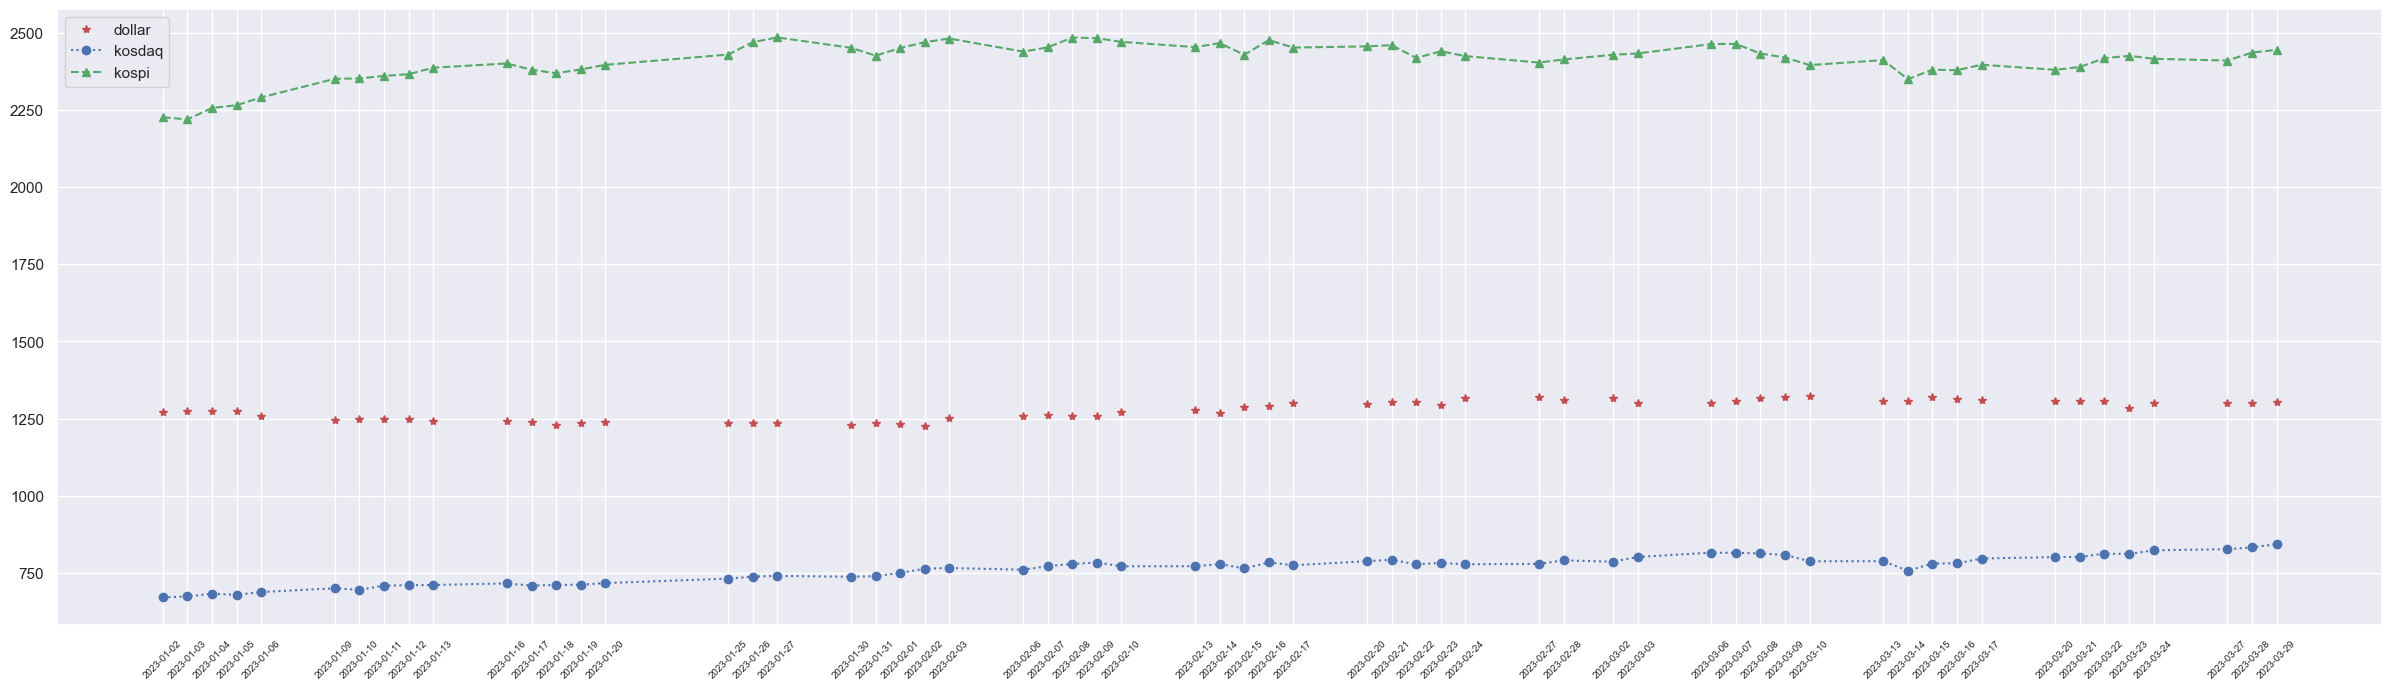

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(30,8))

plt.plot(bin_df['localTradedAt'],bin_df['closePrice'],'r*')

plt.plot(kosdaq_price['localDate'],kosdaq_price['closePrice'],'bo:')

plt.plot(kospi_price['localDate'],kospi_price['closePrice'],'g^--')

plt.xticks(kosdaq_price['localDate'], rotation=45, fontsize=7)

#plt.xticks(rotation=45, fontsize=7)

plt.legend(['dollar','kosdaq','kospi'])
plt.show()            